<a href="https://colab.research.google.com/github/FulISun/Computer_Vision/blob/main/02_NN_MNIST_sparse_dropout_batchnormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sparse ver

## [1] MNIST Data 생성 및 확인

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, t_train), (X_test, t_test) = mnist.load_data()

print()
print('X_train.shape = ', X_train.shape, ', t_train.shape = ', t_train.shape) # (batch_size, W, H) = 데이터 수, width, height, (channel). 흑백 사진이라 채널 1이라서 생략
print('X_test.shape = ', X_test.shape, ', t_test.shape = ', t_test.shape)

# (batch_size, W, H, channel) <= 이미지는 4차원으로 표현됨

11501568/11490434 [==============================] - 0s 0us/step

X_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
X_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


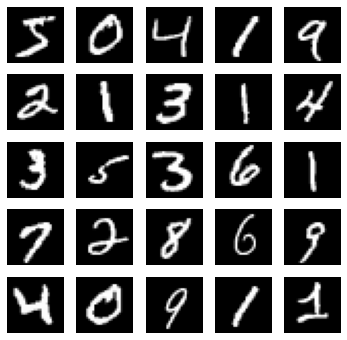

In [ ]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력

plt.figure(figsize = (6, 6))

for index in range(25): # 25개 출력

    plt.subplot(5, 5, index + 1) # 5행 5열
    plt.imshow(X_train[index], cmap = 'gray')
    plt.axis('off')

plt.show()

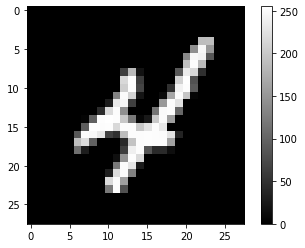

In [ ]:
plt.imshow(X_train[9], cmap = 'gray')
plt.colorbar()
plt.show()

## [2] 데이터 전처리

In [ ]:
# X_train, X_test 값 범위를 0~1 사이로 정규화

# 일반적으로 이미지는 정규화를 해야 fitting이 잘 된다고 알려져 있음!! 
X_train = X_train / 255.0
X_test = X_test / 255.0

# 정규화 결과 확인
print('train max = ', X_train[0].max(), ',train min = ', X_train[0].min())
print('test max = ', X_test[0].max(), ',test min = ', X_test[0].min())

train max =  1.0 ,train min =  0.0
test max =  1.0 ,test min =  0.0


## [3] 모델 구축 및 컴파일

### Dropout

* rate에 지정된 비율만큼 랜덤하게 층과 층 사이 연결을 끊어서 overfitting을 방지함

* input data를 바꿀 수 없다면 output을 바꾸는 개념임. output이 바뀌면 loss입장에서는 input이 바뀐 것과 동일한 효과를 보기 때문.

In [ ]:
model = Sequential() # model 생성 

model.add(Flatten(input_shape = (28, 28, 1))) # 신경망은 데이터가 1차원 벡터로 들어와야 해서 Flatten. 784 각각이 feature라고 생각하면 됨

model.add(Dense(100, activation = 'relu'))

# model.add(tf.keras.layers.Dropout(0.25)) # drop out 추가

model.add(tf.keras.layers.Dropout(0.50))

# model.add(tf.keras.layers.Dropout(0.75))

model.add(Dense(10, activation = 'softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer = SGD(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## [4] 모델 학습

### Callback

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath = './modelcheckpoint_test.h5',
                             moniter = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             model = 'auto')

stopping = EarlyStopping(monitor = 'val_loss',
                         patience = 5)

In [ ]:
hist = model.fit(X_train, t_train, epochs=50, validation_split=0.2,
              callbacks = [checkpoint, stopping])

Epoch 1/50
1486/1500 [============================>.] - ETA: 0s - loss: 0.9166 - accuracy: 0.7251
Epoch 1: val_loss improved from inf to 0.42199, saving model to ./modelcheckpoint_test.h5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.9151 - accuracy: 0.7255 - val_loss: 0.4220 - val_accuracy: 0.8963
Epoch 2/50
1475/1500 [============================>.] - ETA: 0s - loss: 0.5265 - accuracy: 0.8469
Epoch 2: val_loss improved from 0.42199 to 0.32512, saving model to ./modelcheckpoint_test.h5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5249 - accuracy: 0.8474 - val_loss: 0.3251 - val_accuracy: 0.9128
Epoch 3/50
1484/1500 [============================>.] - ETA: 0s - loss: 0.4406 - accuracy: 0.8722
Epoch 3: val_loss improved from 0.32512 to 0.28562, saving model to ./modelcheckpoint_test.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4403 - accuracy: 0.8723 - val_loss: 0.2856 - val_accuracy: 0.9223
Epoch 4/50
1478/1500 [=======

## [5] 모델 정확도 평가

In [ ]:
model.evaluate(X_test, t_test)

# 학습시킨 모델의 정확도 평가는 evaluate, 특정 값 예측은 predict

313/313 [==============================] - 1s 2ms/step - loss: 0.1077 - accuracy: 0.9679


[0.10766132920980453, 0.9678999781608582]

## [6] 손실 및 정확도 추세

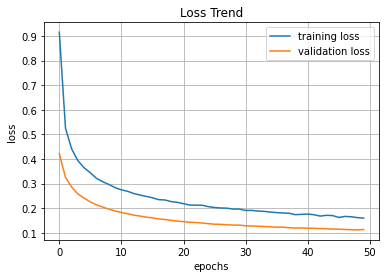

In [ ]:
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'training loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')

plt.show()

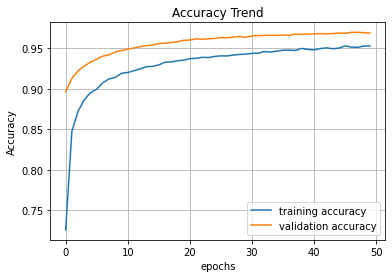

In [ ]:
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label = 'training accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')
plt.legend(loc = 'best')

plt.show()

In [ ]:
pred = model.predict(X_test)

print(pred.shape)

print(pred[:5]) # 모델이 예측한 pred[:5] 필기체 손글씨 숫자와 정답 비교

print()
print(np.argmax(pred[:5], axis = 1))

(10000, 10)
[[6.5041682e-08 1.9348308e-08 1.3496410e-05 2.3467565e-04 1.9441547e-10
  3.7691967e-07 2.3707895e-12 9.9972469e-01 4.2990314e-07 2.6316073e-05]
 [2.4650546e-05 8.4481966e-05 9.9972492e-01 1.0237987e-04 5.6537473e-11
  1.5138073e-05 3.6306421e-05 9.1680374e-10 1.2081747e-05 1.8661548e-11]
 [5.8463638e-06 9.9767345e-01 4.9475417e-04 1.4269153e-04 3.4119839e-05
  8.3090301e-05 6.6303328e-05 1.2673571e-03 2.0019483e-04 3.2058098e-05]
 [9.9915242e-01 2.7999320e-06 5.9972157e-05 4.9125620e-06 6.6225419e-07
  1.0621274e-04 5.0336478e-04 1.1136468e-04 1.1423935e-05 4.6763991e-05]
 [1.6321452e-05 3.0850302e-07 9.0365211e-05 1.7462007e-06 9.9195015e-01
  5.1326708e-05 5.8665315e-05 7.7462412e-04 1.6008620e-05 7.0404960e-03]]

[7 2 1 0 4]


## [+] BatchNormalization

* 데이터 평균을 0, 표준편차를 1로 분포 시킴. 높은 학습율을 사용하여 빠른 속도로 학습하면서 overfitting을 줄이는 효과가 있다고 알려져 있지만, 데이터에 따라 효과가 없는 경우도 많음

In [ ]:
model = Sequential() # model 생성 

model.add(Flatten(input_shape = (28, 28, 1))) # 신경망은 데이터가 1차원 벡터로 들어와야 해서 Flatten. 784 각각이 feature라고 생각하면 됨

model.add(Dense(100, activation = 'relu'))

model.add(BatchNormalization()) # BatchNormalization() 추가

model.add(Dense(10, activation = 'softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,910
Trainable params: 79,710
Non-trainable params: 200
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, t_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4300 - accuracy: 0.8765 - val_loss: 0.2303 - val_accuracy: 0.9373
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2317 - accuracy: 0.9340 - val_loss: 0.1733 - val_accuracy: 0.9516
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1813 - accuracy: 0.9474 - val_loss: 0.1497 - val_accuracy: 0.9583
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1534 - accuracy: 0.9571 - val_loss: 0.1320 - val_accuracy: 0.9628
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1353 - accuracy: 0.9613 - val_loss: 0.1256 - val_accuracy: 0.9654
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1220 - accuracy: 0.9659 - val_loss: 0.1181 - val_accuracy: 0.9680
Epoch 7/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1106 - accuracy: 0.9680 - val_loss: 0.1101 - val_accuracy:

In [ ]:
# test data 이용하여 정확도 검증

model.evaluate(X_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.9756


[0.08954950422048569, 0.975600004196167]

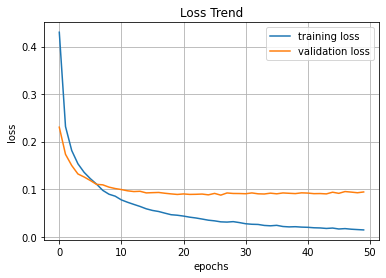

In [ ]:
# 손실함수 그래프

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

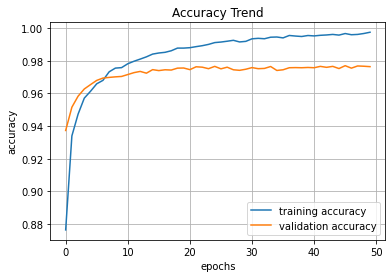

In [ ]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()